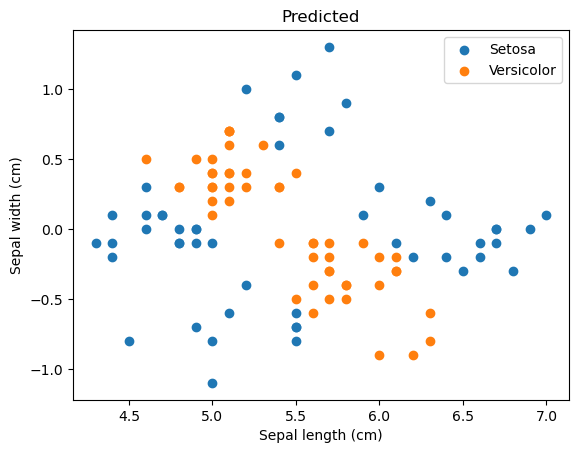

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy()

# Mean to 0
sl_ave = np.average(sl_data)  # Mean Value
sl_data -= sl_ave  
sw_ave = np.average(sw_data)
sw_data -= sw_ave

# Store inputs in a list
input_data = []
for i in range(100):  # 0-99 in the i
    input_data.append([sl_data[i], sw_data[i]])

# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Neurons
class Neuron:
    def __init__(self):  # initial set up
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# Neural network
class NeuralNetwork:
    def __init__(self):  # initial set up
        # weight
        self.w_im = [[4.0, 4.0], [4.0, 4.0]]  
        self.w_mo = [[1.0, -1.0]]  
        
        # bias
        self.b_m = [2.0, -2.0]
        self.b_o = [-0.5]  

        # Declaration of each layer
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]

    def commit(self, input_data):  # result
        # Reset each layer
        self.input_layer[0] = input_data[0]   # Input layer only receives values
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()

        # Input layer → middle layer
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])

        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])

        # Intermediate layer → output layer
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])

        return self.output_layer[0].get_output()

# Instances of neural networks
neural_network = NeuralNetwork()

# result
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

#  Graphical display of classification results
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() 
sw_data = iris_data[:100, 1].copy()  


sl_ave = np.average(sl_data)  
sl_data -= sl_ave 
sw_ave = np.average(sw_data)
sw_data -= sw_ave


train_data = []
for i in range(100): 
    correct = iris.target[i]
    train_data.append([sl_data[i], sw_data[i], correct])

# Sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Neuron
class Neuron:
    def __init__(self):  # Initial settings
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# Neural network
class NeuralNetwork:
    def __init__(self):  # Initial settings
        # Weights
        self.w_im = [[4.0, 4.0], [4.0, 4.0]]  
        self.w_mo = [[1.0, -1.0]]  

        # Biases
        self.b_m = [2.0, -2.0]  
        self.b_o = [-0.5] 

        # Declare each layer
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]

    def commit(self, input_data):  # Execute
        # Reset each layer
        self.input_layer[0] = input_data[0]  # Input layer only receives values
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()

        # Input layer -> Middle layer
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])

        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])

        # Middle layer -> Output layer
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])

        return self.output_layer[0].get_output()

    def train(self, correct):
        # Learning rate
        k = 0.3

        # Output
        output_o = self.output_layer[0].output
        output_m0 = self.middle_layer[0].output
        output_m1 = self.middle_layer[1].output

        # δ (delta)
        delta_o = (output_o - correct) * output_o * (1.0 - output_o)

        # Update parameters
        self.w_mo[0][0] -= k * delta_o * output_m0
        self.w_mo[0][1] -= k * delta_o * output_m1
        self.b_o[0] -= k * delta_o

# Neural network instance
neural_network = NeuralNetwork()

# Parameter changes due to learning
print("-------- Before train --------")
print(neural_network.w_im)
print(neural_network.w_mo)
print(neural_network.b_m)
print(neural_network.b_o)
neural_network.commit(train_data[0][:2])  # Forward pass
neural_network.train(train_data[0][2])  # Backpropagation
print("-------- After train --------")
print(neural_network.w_im)
print(neural_network.w_mo)
print(neural_network.b_m)
print(neural_network.b_o)


-------- Before train --------
[[4.0, 4.0], [4.0, 4.0]]
[[1.0, -1.0]]
[2.0, -2.0]
[-0.5]
-------- After train --------
[[4.0, 4.0], [4.0, 4.0]]
[[0.9628174102667754, -1.0055134242038597]]
[2.0, -2.0]
[-0.541645676531177]
